# Lot Rakiety

https://qabrio.pl/python-matplotlib-pyplot-jak-generowac-wykresy-2/
strona jak robić wykresy 

***Wstęp.*** 
- Powinien wprowadzać czytelnika w temat projektu oraz zawierać motywacje, cel i znaczenie wykonanej pracy. 
- Notka historyczna jest również bardzo mile widziana.


Celem projektu jest modelowanie toru lotu rakiety batalistycznej. Do modelowania toru ruchu można podejść na wiele sposobów. Dla uproszczenia czasami traktuje się to jako problem dwuwymiarowy, np. w odniesieniu do rakiet taktycznych niewielkiego zasięgu, jednak to rozwiązanie nie uwzględnia m.in kierunku działania linii sił centralnego pola grawitacyjnego, krzywizny Ziemi czy obecności sił pozornych i nie nadaje się do użycia w obronie przeciwrakietowej. [1]

***Opis zjawiska/podstawy teoretyczne.***
- W tym dziale znajdować się powinny wszystkie potrzebne (techniczne) informacje dotyczące opisywanego tematu. 
- Zawiera on na przykład definicje, z których później korzystamy lub
opis zjawiska fizycznego, które modelujemy.


**z drugiego artykułu**

W celu ujednolicenia procedur procedur obliczania trajektorii lotu (dla ułatwienia współpracy między różnymi ośrodkami badawczymi) NATO utworzyło umowę standaryzacyjną Stanag 4355. Z tego standardu korzysta wiele artykułów poświęconych modelowaniu toru ruchu rakiety. [3]

Modelowanie w tym standardzie względnia 4 fazy ruchu:
- ruch rakeity po wyrzutni z pracującym silnikiem rakietowym
- lot rakiety od momentu zejścia z wyrzutni $t_L$ do momentu rozłożenia stateczników $t_{FO}$ (lot ze złożonymi statecznikami i pracującym silnikiem rakietowym) 
- lot rakiety od momentu rozłożenia stateczników $t_{FO}$ do czasu nieznacznie przekraczającego koniec pracy silnika rakietowego $t_{E5D}$ (lot z rozłożonymi statecznikami i pracującym silnikiem rakietowym) 
- lot rakiety z rozłożonymi statecznikami i niepracującym silnikiem rakietowym. [2]   

Do określenia położenia pocisku rakietowego względem Ziemi w Stanagu 4355 ed.4 
stosuje się prawoskrętny, ortonormalny, kartezjański układ odniesienia, związany z Ziemią **o 
początku w punkcie stania wyrzutni**, oznaczany następująco $O_0123$ (rys. 1). Położenie środka 
masy pocisku rakietowego względem układu ziemskiego określa wektor $\overline{X}$



Rakietę można traktować jako punkt materialny z sześcioma stopniami swobody lub trzema, jeśli zaniedbamy obroty w przestrzeni.    

**z tego pierwszego artykułu**

Możliwe wykorzystanie modelu matematycznego : 
- do wyznaczania parametrów lotu rakiet balistycznych,
- do określania możliwości bojowych rakiet balistycznych, a tym samym szacowania 
stref rażenia i obszarów ryzyka,
- jako generatora danych wejściowych dla algorytmów symulacyjnych śledzenia 
i predykcji trajektorii rakiet balistycznych. [1]

W artykule przedstawiono model matematyczny lotu rakiety balistycznej w centralnym polu grawitacyjnym, opracowany z wykorzystaniem notacji macierzowej.
Model uwzględnia trzy charakterystyczne dla rakiet balistycznych fazy lotu: 
- startową (ang. boost phase), 
- środkową (ang. midcourse phase) i 
- terminalną (ang. terminal phase) 

oraz wpływ oddziaływania atmosfery i sił pozornych na ruch 
rakiet w przestrzeni. (siła odśrodkowa i Coriolisa)

Obliczenia trajektorii lotu rakiety balistycznej prowadzone są w kartezjańskim układzie 
współrzędnych, przedstawionym na rys. 1. **Początek tego układu pokrywa się ze środkiem 
Ziemi**, oś z skierowana jest do góry i przechodzi przez biegun północny, zaś osie x i y są 
prostopadłe względem siebie i leżą w płaszczyźnie równika, przy czym x przechodzi przez 
południk 0° (Greenwich). Przyjęty układ odniesienia jest układem nieinercjalnym, obraca się 
z prędkością kątową ω względem osi z, co implikuje konieczność uwzględnienia 
w rozważaniach sił: odśrodkowej i Coriolisa. Na potrzeby obliczeń zakłada się ponadto, że 
powierzchnia planety jest idealną sferą, zaś Ziemia charakteryzuje się następującymi 
parametrami fizycznymi: promieniem R = 6,37·106 m, masą M = 5,97·1024 kg i prędkością 
obrotową ω = 7,29·10-5
rad/s. Wartość stałej grawitacyjnej wynosi G = 6,67·10-11 m
3
/kg·s.


W każdej fazie wykorzystywany jest inny model matematyczny.

Poniżej rysunek pomocniczy układu odniesienia na którym będziemy pracować. 

*nie jestem przekonana jak to będzie wyglądać u pana, jeśli prześlemu mu zipa z wszyskimi plikami to POWINNO się normalnie pokazywać ale idk*

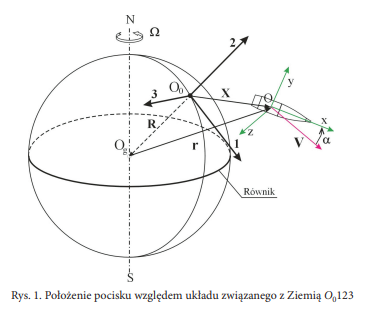

In [10]:
from IPython.display import Image

Image("rys1.png")
# źródło : [1]
Image("rys1a.png")
# źródło : [2]

***Wyniki.***
- Jest to główna część projektu zawierająca obliczenia, rachunki numeryczne oraz analizę danych eksperymentalnych. 
- To, co dokładnie się tu znajdzie, w bardzo dużym stopniu zależy od tematu projektu i pomysłu
autorów.
- Algorytm numeryczny służący do rozwiązywania równania różniczkowego trzeba zaimplementować
samemu.

Kod od Karola

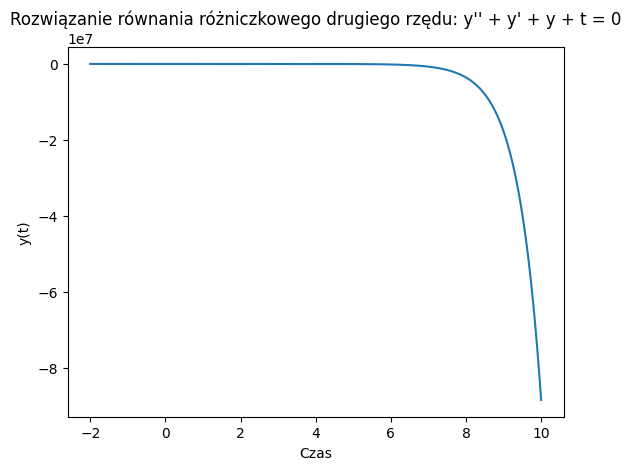

In [ ]:
import math

import numpy as np
import matplotlib.pyplot as plt

def solve_second_order_ode(f, y0, yp0, t0, tn, h):
    """
    Rozwiązywanie równania różniczkowego drugiego rzędu za pomocą metody numerycznej (metoda Eulera).

    Parametry:
    - f: funkcja opisująca równanie różniczkowe (f(t, y, y'))
    - y0, yp0: warunki początkowe dla y i y'
    - t0, tn: przedział czasowy [t0, tn]
    - h: krok czasowy

    Zwraca:
    - t: tablica czasów
    - y: tablica wartości funkcji y(t)
    """
    num_steps = int((tn - t0) / h) + 1
    t = np.linspace(t0, tn, num_steps)
    y = np.zeros((num_steps, 2))
    y[0, 0] = y0
    y[0, 1] = yp0

    for i in range(1, num_steps):
        y_prev = y[i - 1, :]
        t_prev = t[i - 1]
        y[i, 0] = y_prev[0] + h * y_prev[1]
        y[i, 1] = y_prev[1] + h * f(t_prev, y_prev[0], y_prev[1])

    return t, y[:, 0]

def plot_solution(t, y, equation_name):
    """
    Rysowanie wykresu rozwiązania równania różniczkowego.

    Parametry:
    - t: tablica czasów
    - y: tablica wartości funkcji y(t)
    - equation_name: nazwa równania (do tytułu wykresu)
    """
    plt.plot(t, y)
    plt.xlabel('Czas')
    plt.ylabel('y(t)')
    plt.title(f'Rozwiązanie równania różniczkowego drugiego rzędu: {equation_name}')
    plt.show()

# Przykładowe równanie różniczkowe postaci y'' + y' + y + t = 0
def example_ode(t, y, yp):
    return t + yp + y

# Warunki początkowe
y0 = 0.0
yp0 = 0.0

# Przedział czasowy
t0 = -2
tn = 10.0

# Krok czasowy
h = 0.01

# Rozwiązanie równania różniczkowego
t, y = solve_second_order_ode(example_ode, y0, yp0, t0, tn, h)

# Wykres wyników
plot_solution(t, y, "y'' + y' + y + t = 0")

***Podsumowanie i wnioski.***
- Krótki opis tego, co zostało zrobione i co z tego wynika.

***Literatura.***
- Spis wykorzystanych prac innych autorów. Bibliografia powinna być numerowana z użyciem kwadratowych nawiasów, np. [1]. Każda pozycja musi mieć odnośnik w głównym tekście pracy. Standard bibliograficzny odwołań powinien być jednakowy dla wszystkich pozycji. Można odwoływać się również do stron internetowych, ale zaznaczmy, że Wikipedia nie jest źródłem naukowym. Stanowi ona jednak bardzo dobre źródło odnośników do oryginalnych prac. Polecam również korzystanie z Google Scholar do znajdywania artykułów.


[1] *MODELOWANIE TRAJEKTORII LOTU RAKIETY BALISTYCZNEJ W CENTRALNYM POLU GRAWITACYJNYM*, mgr inż. Witold BUŻANTOWICZ, Wojskowa Akademia Techniczna

[2] *RÓWNANIA RUCHU NIEKIEROWANYCH POCISKÓW 
RAKIETOWYCH STABILIZOWANYCH BRZECHWOWO 
ZGODNE ZE STANAGIEM 4355 ED.4*, dr inż. Leszek BARANOWSKI, Wojskowa Akademia Techniczna

[3] *Model trajektorii lotu pocisku wirującego o sześciu stopniach swobody zgodny ze Stanagiem 4355*, LESZEK BARANOWSKI